In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from plotting_functions import nn_plot_epoch_mse
from enkf_functions import enkf_regressor_extension
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = wine_prep()

In [5]:
# old settings -> the corresponding model shall be extended
setting_dict = {"particles": 1,
                "epochs": 50,
                "batch_size": 200,    # len(X_train)
                "h_0": 2,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

additional_epochs = 10

In [6]:
particle_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]
particle_list = [1000, 1500, 2000]

In [7]:
import time

Epoch 41. Training MSE: 0.348, Test MSE: 0.47.
Epoch 42. Training MSE: 0.347, Test MSE: 0.471.
Epoch 43. Training MSE: 0.346, Test MSE: 0.471.
Epoch 44. Training MSE: 0.345, Test MSE: 0.472.
Epoch 45. Training MSE: 0.344, Test MSE: 0.471.
Epoch 46. Training MSE: 0.343, Test MSE: 0.471.
Epoch 47. Training MSE: 0.343, Test MSE: 0.472.
Epoch 48. Training MSE: 0.342, Test MSE: 0.473.
Epoch 49. Training MSE: 0.341, Test MSE: 0.472.
Epoch 50. Training MSE: 0.341, Test MSE: 0.472.
Calculation time for 700 particles: 55.12832105557124 minutes.


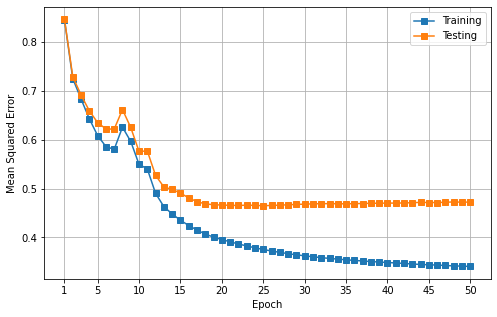

Epoch 41. Training MSE: 0.348, Test MSE: 0.481.
Epoch 42. Training MSE: 0.347, Test MSE: 0.481.
Epoch 43. Training MSE: 0.346, Test MSE: 0.482.
Epoch 44. Training MSE: 0.345, Test MSE: 0.482.
Epoch 45. Training MSE: 0.344, Test MSE: 0.483.
Epoch 46. Training MSE: 0.343, Test MSE: 0.483.
Epoch 47. Training MSE: 0.342, Test MSE: 0.484.
Epoch 48. Training MSE: 0.341, Test MSE: 0.485.
Epoch 49. Training MSE: 0.34, Test MSE: 0.485.
Epoch 50. Training MSE: 0.339, Test MSE: 0.484.
Calculation time for 800 particles: 62.60330583254496 minutes.


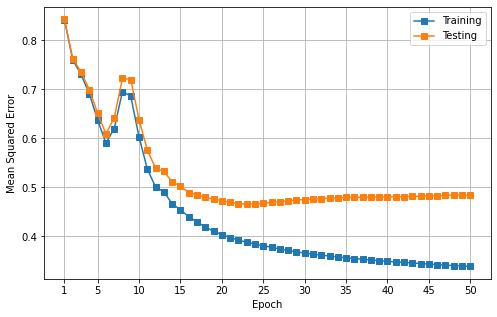

Epoch 41. Training MSE: 0.332, Test MSE: 0.485.
Epoch 42. Training MSE: 0.33, Test MSE: 0.487.
Epoch 43. Training MSE: 0.329, Test MSE: 0.488.
Epoch 44. Training MSE: 0.327, Test MSE: 0.488.
Epoch 45. Training MSE: 0.326, Test MSE: 0.489.
Epoch 46. Training MSE: 0.324, Test MSE: 0.49.
Epoch 47. Training MSE: 0.323, Test MSE: 0.491.
Epoch 48. Training MSE: 0.322, Test MSE: 0.491.
Epoch 49. Training MSE: 0.321, Test MSE: 0.492.
Epoch 50. Training MSE: 0.32, Test MSE: 0.493.
Calculation time for 900 particles: 74.50040019750595 minutes.


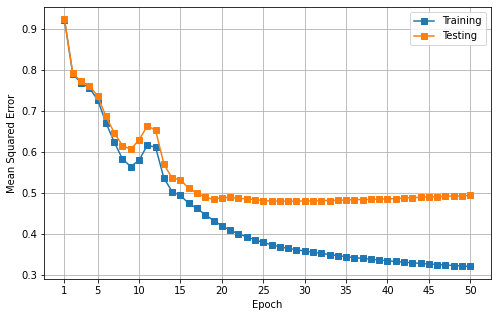

Epoch 41. Training MSE: 0.331, Test MSE: 0.447.
Epoch 42. Training MSE: 0.329, Test MSE: 0.447.
Epoch 43. Training MSE: 0.327, Test MSE: 0.447.
Epoch 44. Training MSE: 0.326, Test MSE: 0.447.
Epoch 45. Training MSE: 0.324, Test MSE: 0.447.
Epoch 46. Training MSE: 0.323, Test MSE: 0.447.
Epoch 47. Training MSE: 0.322, Test MSE: 0.447.
Epoch 48. Training MSE: 0.321, Test MSE: 0.446.
Epoch 49. Training MSE: 0.319, Test MSE: 0.446.
Epoch 50. Training MSE: 0.318, Test MSE: 0.447.
Calculation time for 1000 particles: 81.5416973431905 minutes.


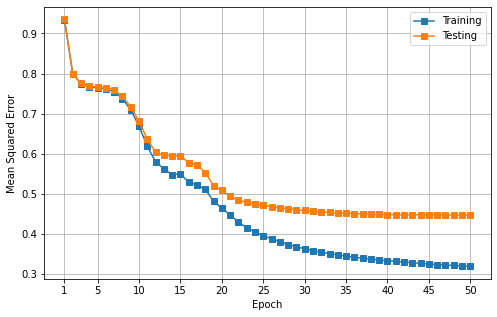

Epoch 41. Training MSE: 0.358, Test MSE: 0.466.
Epoch 42. Training MSE: 0.351, Test MSE: 0.462.
Epoch 43. Training MSE: 0.345, Test MSE: 0.461.
Epoch 44. Training MSE: 0.338, Test MSE: 0.461.
Epoch 45. Training MSE: 0.333, Test MSE: 0.46.
Epoch 46. Training MSE: 0.327, Test MSE: 0.46.
Epoch 47. Training MSE: 0.322, Test MSE: 0.462.
Epoch 48. Training MSE: 0.317, Test MSE: 0.463.
Epoch 49. Training MSE: 0.313, Test MSE: 0.464.
Epoch 50. Training MSE: 0.308, Test MSE: 0.466.
Calculation time for 1500 particles: 135.25073428551357 minutes.


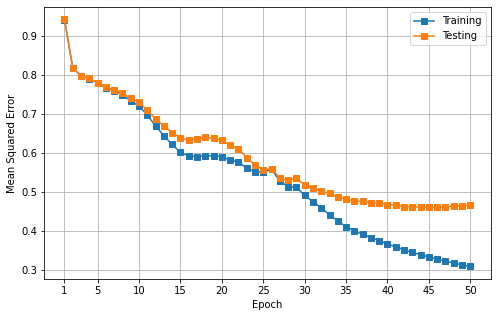

Epoch 41. Training MSE: 0.415, Test MSE: 0.458.
Epoch 42. Training MSE: 0.403, Test MSE: 0.455.
Epoch 43. Training MSE: 0.392, Test MSE: 0.455.
Epoch 44. Training MSE: 0.38, Test MSE: 0.452.
Epoch 45. Training MSE: 0.369, Test MSE: 0.453.
Epoch 46. Training MSE: 0.359, Test MSE: 0.454.
Epoch 47. Training MSE: 0.348, Test MSE: 0.458.
Epoch 48. Training MSE: 0.339, Test MSE: 0.458.
Epoch 49. Training MSE: 0.331, Test MSE: 0.462.
Epoch 50. Training MSE: 0.324, Test MSE: 0.463.
Calculation time for 2000 particles: 189.0070889910062 minutes.


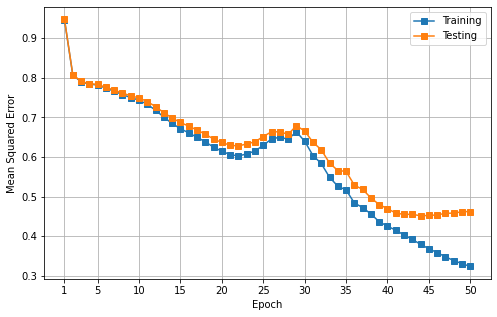

In [8]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

    start_time = time.time()
    mean_model, mean_model_train_mse, mean_model_test_mse = enkf_regressor_extension(extend_model = "../models/wine/enkf_wine_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], p, setting_dict["h_0"]),
                                                                                     additional_epochs = additional_epochs,
                                                                                     save_all = True,
                                                                                     verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    nn_plot_epoch_mse(mean_model_train_mse,
                      mean_model_test_mse,
                      mse_mean = None,
                      savefig = True,
                      file = "../img/wine/enkf_wine_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], p, setting_dict["h_0"]))